In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [45]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [46]:
df.shape

(400, 11)

In [47]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [48]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<Axes: >

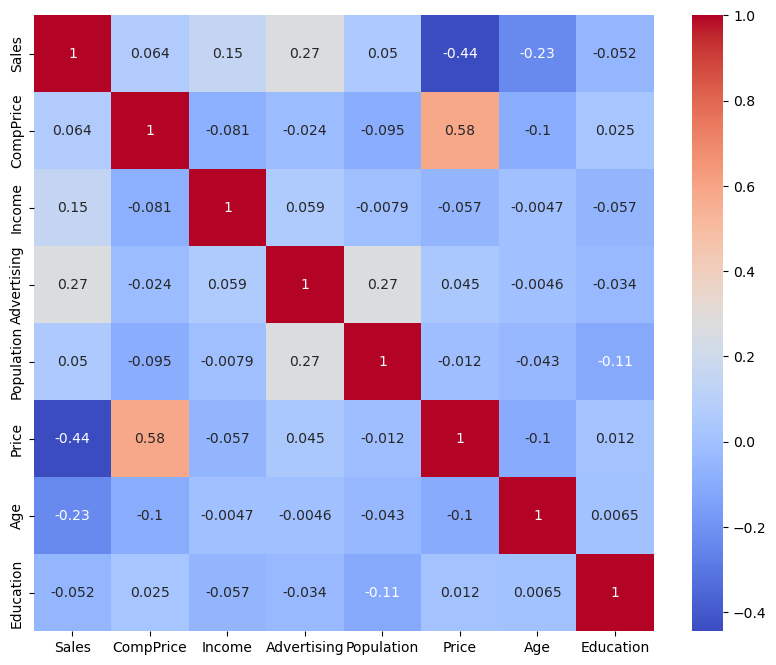

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [50]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


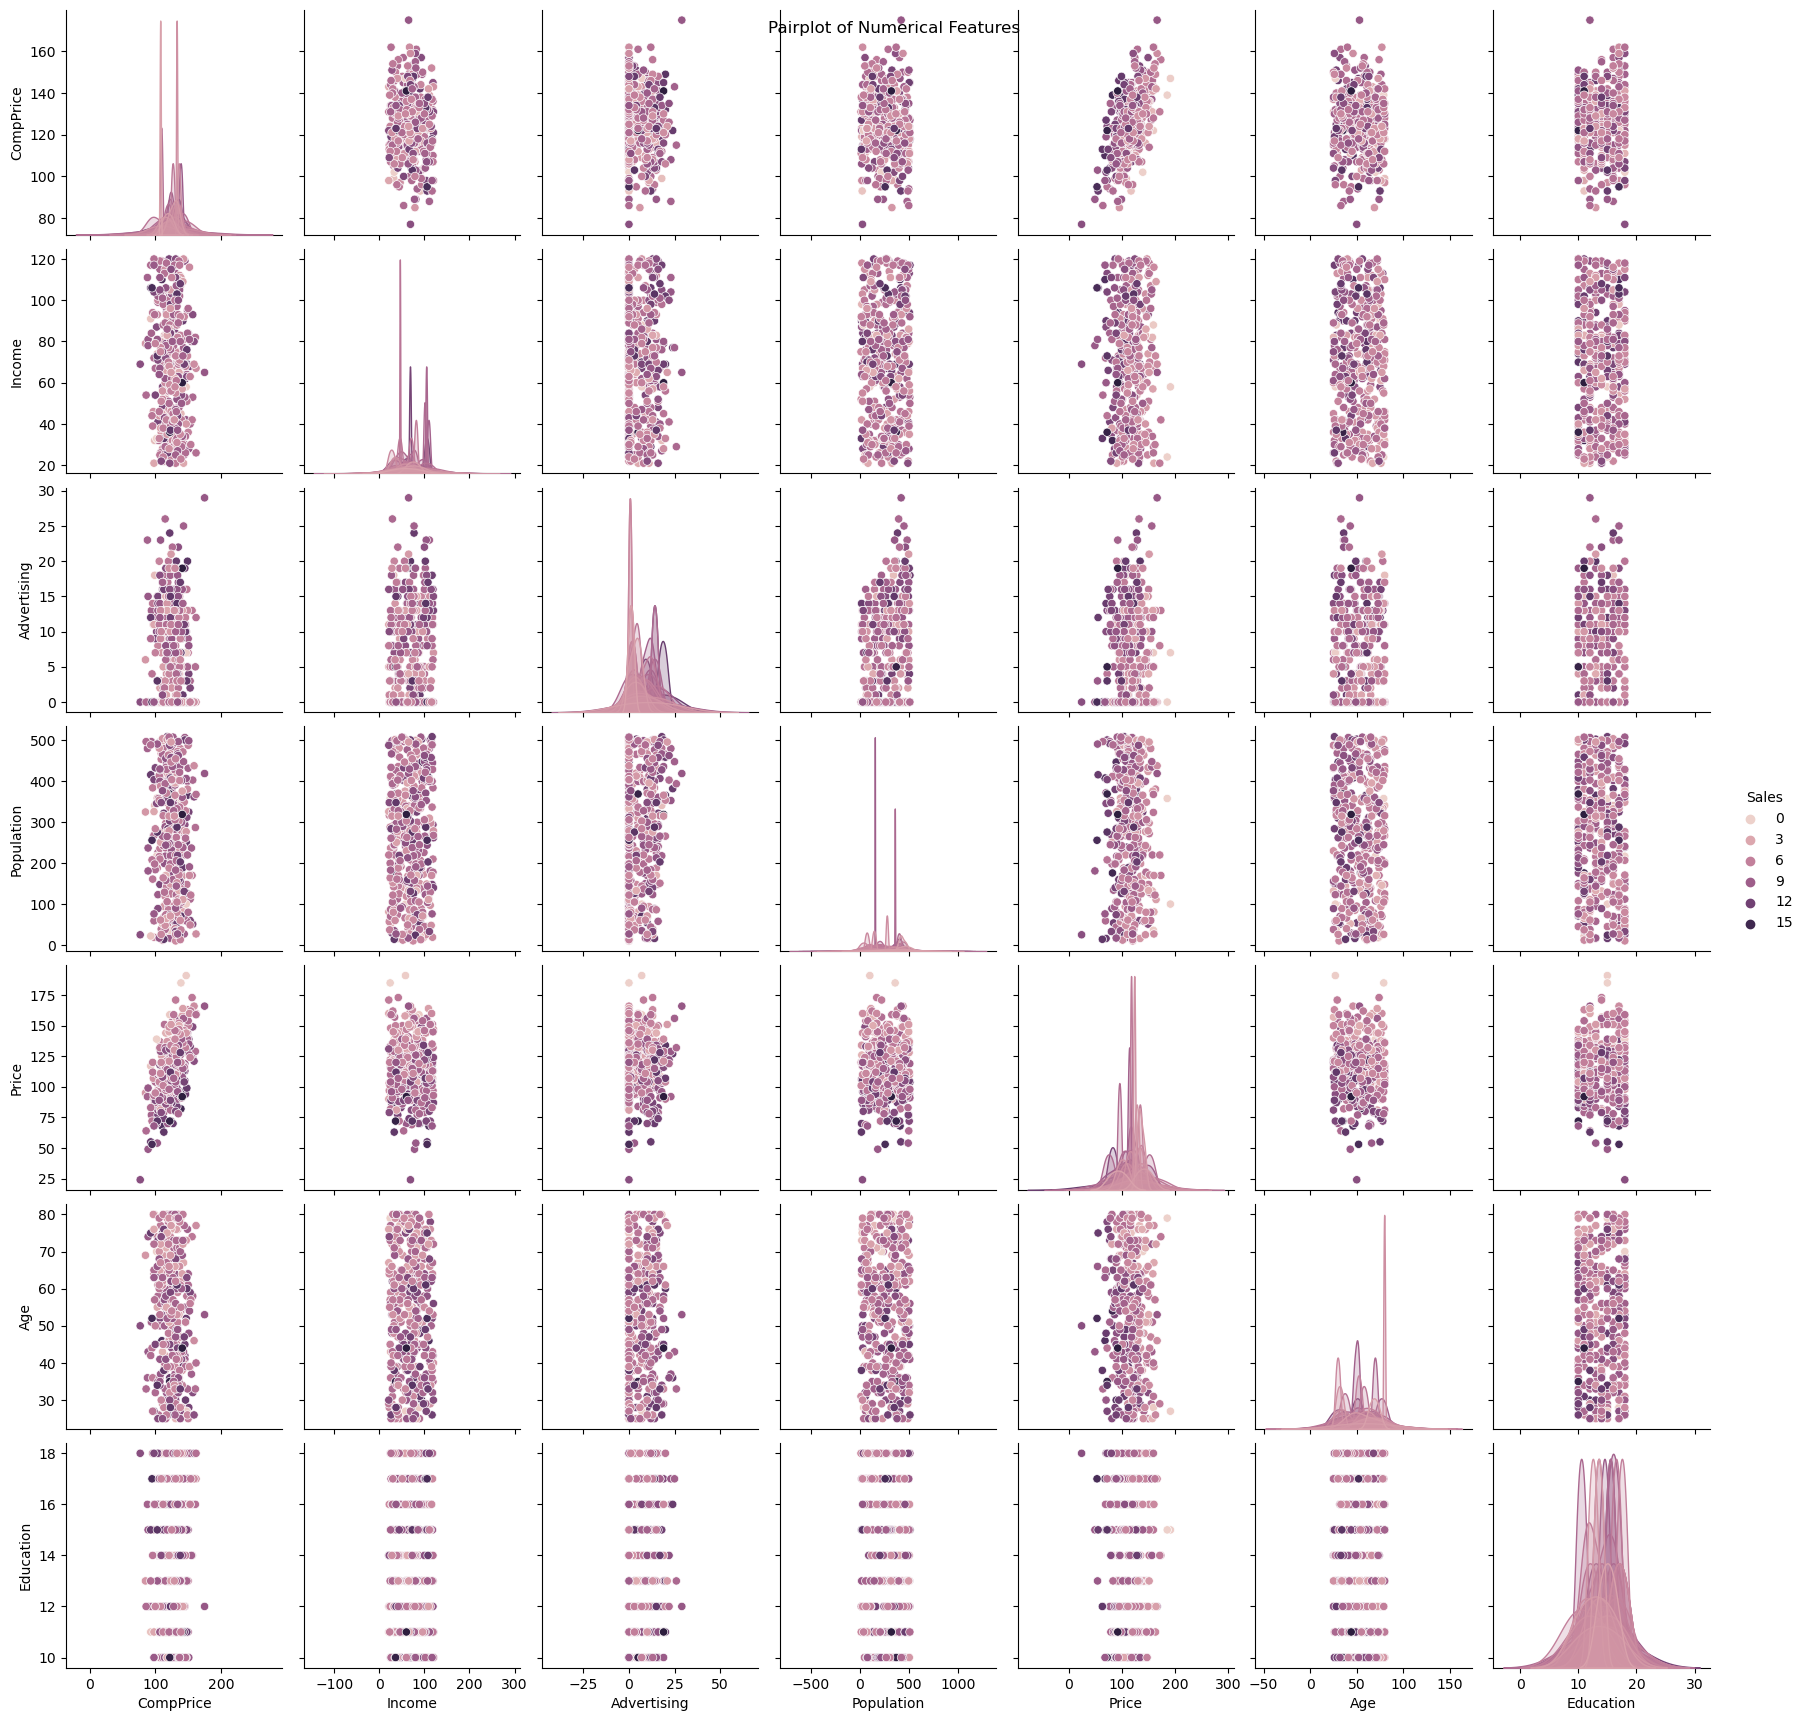

In [51]:
sns.pairplot(df, hue='Sales', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

In [52]:
lb = LabelEncoder()

In [53]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [54]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [55]:
df['ShelveLoc'] = lb.fit_transform(df['ShelveLoc'])
df['Urban']= lb.fit_transform(df['Urban'])
df['US']= lb.fit_transform(df['US'])

In [56]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
ft = df.drop('ShelveLoc', axis = 1)

In [59]:
tt = df['ShelveLoc']

In [60]:
ft.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0


In [61]:
ft.shape

(400, 10)

In [62]:
tt= pd.DataFrame(tt)
tt

,ShelveLoc
0,0
1,1
2,2
3,2
4,0
...,...
395,1
396,2
397,2
398,0


In [63]:
tt.shape

(400, 1)

In [64]:
x_train,x_test,y_train,y_test= train_test_split(ft,tt,train_size=0.80,random_state=100)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=19, max_leaf_nodes=19, n_estimators=1000)

In [68]:
y_pred= rf.predict(x_test)

In [69]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2])

In [70]:
accuracy_score(y_test,y_pred)

0.625

In [71]:
confusion_matrix(y_test,y_pred)

array([[ 5,  0, 15],
       [ 0,  8, 12],
       [ 1,  2, 37]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.25      0.38        20
           1       0.80      0.40      0.53        20
           2       0.58      0.93      0.71        40

    accuracy                           0.62        80
   macro avg       0.74      0.53      0.54        80
weighted avg       0.70      0.62      0.59        80



In [73]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()


In [74]:
param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)})
grid=GridSearchCV(rfc,param_grid)

In [75]:
grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
kfold=KFold(n_splits=10)

In [78]:
results=cross_val_score(rfc,x_train,y_train,cv=kfold)
print(results.mean())

0.61875


In [79]:
model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier

In [80]:
bb=BaggingClassifier(base_estimator=model)
results=cross_val_score(bb,x_train,y_train,cv=kfold)
print(results.mean())

0.60625
